Import Required Packages

In [63]:
# Cameron Knopp, Machine Learning Tue/Thur 2-3:15PM

import numpy as np
import pandas as pd
import math
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

Import Data 

In [64]:
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


Scatter plot of the two classes (admitted vs not admitted) and use color coding to visualize if the example is positive or negative

Text(0, 0.5, 'Exam 2 Score')

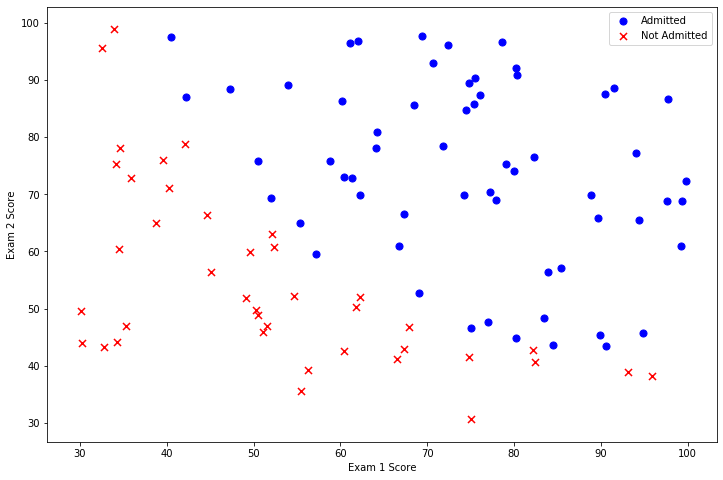

In [66]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Define the sigmoid function

In [67]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Define the cost function for logistic regression

In [68]:
def cost(theta, X, y):
    theta = np.matrix(theta) # make sure theta is a column or row vector! 
    X = np.matrix(X)
    y = np.matrix(y)
    
    # first part of the cost function
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    # second part of cost function
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    return np.sum(first - second)/len(X)

In [69]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

check the shape of the data structures

In [70]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

Compute the cost for our initial solution given zeros for the model parameters

In [71]:
cost(theta, X, y)

0.6931471805599453

Write a function that computes the gradient 

In [72]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    # find each entry of the gradient vector
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term)/len(X)
    
    return grad

Since we're using Python, we can use SciPy's optimization API to do the same thing.

In [73]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost, x0 = theta, fprime = gradient, args = (X,y))
cost(result[0], X, y)

0.20349770158947458

In [74]:
theta = result[0]
print(theta)

[-25.16131863   0.20623159   0.20147149]


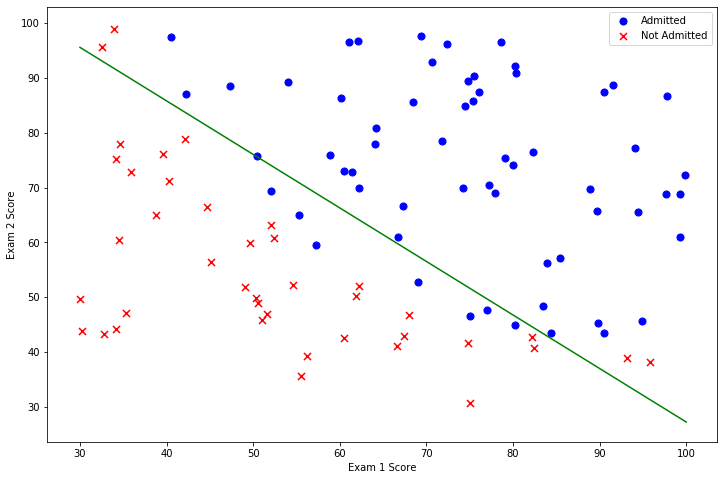

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

x = np.linspace(30,100,100)
coeff1 = -theta[0]/theta[2]
coeff2 = -theta[2]/theta[1]
ax.plot(x, coeff1 + coeff2*x, c = 'g')